# AA/EE/ME 548: Homework 01

## Name: Yenpang Huang

### Homework feedback:

**What was the coolest thing(s) you learned from lectures/homework that you didn't know previously?**

Coding

**Which problem did you find the most challenging and why?**

Problem 4. Starter code is helpful but also makes it more challenging.

**Approximate how long did you spend on this homework?**

A week

## Submission details
To submit your homework, please save a PDF copy of your notebook (make sure all the cells are run correctly, and the correct outputs are displayed), and submit via Canvas.

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np
from jax.typing import ArrayLike
import matplotlib.pyplot as plt
import sympy as sym

## Problem 1

In [ ]:
w = 1
s = w*1j
A = np.array([[1/(s+1), 2/(s+1)], [(s**2+1)/(s+10), 1/(s**2+2)]])
[U, S, V] = jnp.linalg.svd(A)

The singular values calculated from SVD are
$$ \sigma_{1} = 0.386 $$
$$ \sigma_{2} = 1.831 $$
this leads to
$$ 10\cdot\sigma_{1} \leq M \leq 10\cdot\sigma_{2} $$
and since
$$ \sqrt{\mu_1^2+\mu_2^2} \leq 10 $$
$$ 0 \leq M \leq 18.31 $$

(a) Yes, the response satisfy the conditions.

(b) No, $y_2(t)$ has incorrect frequency.

(c) Yes, the response satisfy the conditions.

(d) No, the response has M $\approx $ 19.02 which is outside the range.

(e) Yes, the response satisfy the conditions.

(f) Yes, the response satisfy the conditions.


# Problem 2

$$ ||\mu|| = \sqrt{3^2+4^2} = 5 $$
At $ \omega = 30$, singular values are -20dB $ \rightarrow \sigma_{min} = 0.1 $ and 0dB $ \rightarrow \sigma_{max} = 1 $\
Hence,
$$ 0.5 \leq M \leq 5 $$

(a) Yes, the response satisfy the conditions.

(b) No, the response has M $ \approx $ 5.39 which is outside the range.

(c) No, the response has M = 0.1 which is outside the range.

(d) Yes, the response satisfy the conditions.

(e) Yes, the response satisfy the conditions.

# Problem 3

## 3(a)

[enter your answer here]

$ x_{t+1} = \begin{bmatrix}
x(t) + v \cdot cos(\theta) \cdot \Delta t + 0.5 \cdot a \cdot cos(\theta)(\Delta t)^2 \\
y(t) + v \cdot sin(\theta) \cdot \Delta t + 0.5 \cdot a \cdot sin(\theta)(\Delta t)^2 \\
\theta \\
v + a \cdot \Delta t \\
\end{bmatrix} $

## 3(b)

In the next cell, you are provided a control sequence `controls` which is `T` time steps long, and an `initial_state` value.

In [ ]:
## DO NOT ALTER ##
T = 40
w_sequence = jnp.sin(jnp.linspace(0, jnp.pi, T))  # w varies sinusoidally over time
controls = jnp.stack([w_sequence, jnp.zeros(T)], 1)  # a is zero (constant speed), size [T, 2] array
initial_state = jnp.array([0, 0, 0, 2])  # initial state, size [4,] array
#####################

In [ ]:
## [put your code here]


## 3(b) `t=0.01`

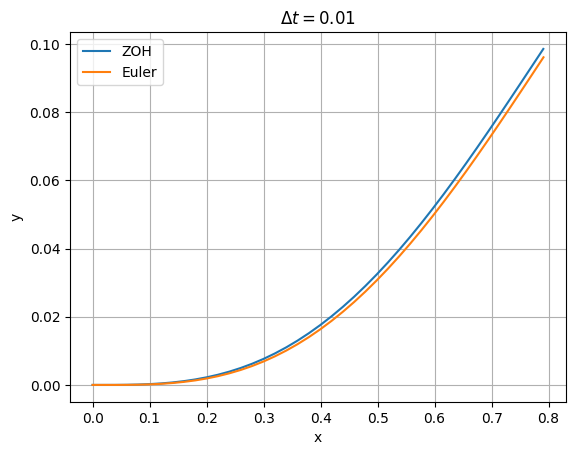

In [ ]:
# [put your code here]
# label your plots clearly, including a legend describing which trajectory corresponds to zero-order hold or euler integration

dt = 0.01

x = np.zeros(T+1)
y = np.zeros(T+1)
theta = np.zeros(T+1)
v = np.zeros(T+1)

x[0] = initial_state[0]
y[0] = initial_state[1]
theta[0] = initial_state[2]
v[0] = initial_state[3]

smallw = controls[:, 0] < 10**(-3)
index = np.where(smallw)[0]

for i in range(T):
    w = controls[i, 0]
    a = controls[i, 1]

    if i in index:
      x[i+1] = x[i] + v[i]*np.cos([theta[i]])*dt + 0.5*a*np.cos([theta[i]])*(dt**2)
      y[i+1] = y[i] + v[i]*np.sin([theta[i]])*dt + 0.5*a*np.sin([theta[i]])*(dt**2)
      theta[i+1] = theta[i]
      v[i+1] = v[i] + a*dt

    else:
      x[i+1] = (x[i] + v[i]*(np.sin([theta[i]+w*dt]) - np.sin(theta[i]))/w +
                (a*np.sin([theta[i]+w*dt]))*dt/w + a/w*(np.cos([theta[i]+w*dt]) - np.cos(theta[i]))/w)

      y[i+1] = (y[i] - v[i]*(np.cos([theta[i]+w*dt]) - np.cos(theta[i]))/w -
                (a*np.sin([theta[i]+w*dt]))*dt/w + a/w*(np.sin([theta[i]+w*dt]) - np.sin(theta[i]))/w)

      theta[i+1] = theta[i] + w*dt
      v[i+1] = v[i] + a*dt
################################################################################

x_ = np.zeros(T+1)
y_ = np.zeros(T+1)
theta_ = np.zeros(T+1)
v_ = np.zeros(T+1)

x_[0] = initial_state[0]
y_[0] = initial_state[1]
theta_[0] = initial_state[2]
v_[0] = initial_state[3]

for k in range(T):
    w_ = controls[k, 0]
    a_ = controls[k, 1]

    x_[k+1] = x_[k] + dt*v_[k]*np.cos([theta_[k]])
    y_[k+1] = y_[k] + dt*v_[k]*np.sin([theta_[k]])
    theta_[k+1] = theta_[k] + w_*dt
    v_[k+1] = v_[k] + a_*dt

plt.plot(x, y, x_, y_)
plt.title('$ \Delta t = 0.01 $')
plt.legend(['ZOH', 'Euler'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

## 3(b) `t=0.1`

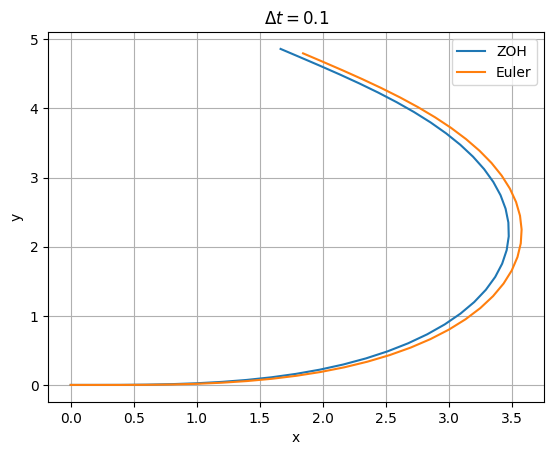

In [ ]:
# [put your code here]
# label your plots clearly, including a legend describing which trajectory corresponds to zero-order hold or euler integration

dt = 0.1

x = np.zeros(T+1)
y = np.zeros(T+1)
theta = np.zeros(T+1)
v = np.zeros(T+1)

x[0] = initial_state[0]
y[0] = initial_state[1]
theta[0] = initial_state[2]
v[0] = initial_state[3]

smallw = controls[:, 0] < 10**(-3)
index = np.where(smallw)[0]

for i in range(T):
    w = controls[i, 0]
    a = controls[i, 1]

    if i in index:
      x[i+1] = x[i] + v[i]*np.cos([theta[i]])*dt + 0.5*a*np.cos([theta[i]])*(dt**2)
      y[i+1] = y[i] + v[i]*np.sin([theta[i]])*dt + 0.5*a*np.sin([theta[i]])*(dt**2)
      theta[i+1] = theta[i]
      v[i+1] = v[i] + a*dt

    else:
      x[i+1] = (x[i] + v[i]*(np.sin([theta[i]+w*dt]) - np.sin(theta[i]))/w +
                (a*np.sin([theta[i]+w*dt]))*dt/w + a/w*(np.cos([theta[i]+w*dt]) - np.cos(theta[i]))/w)

      y[i+1] = (y[i] - v[i]*(np.cos([theta[i]+w*dt]) - np.cos(theta[i]))/w -
                (a*np.sin([theta[i]+w*dt]))*dt/w + a/w*(np.sin([theta[i]+w*dt]) - np.sin(theta[i]))/w)

      theta[i+1] = theta[i] + w*dt
      v[i+1] = v[i] + a*dt
################################################################################

x_ = np.zeros(T+1)
y_ = np.zeros(T+1)
theta_ = np.zeros(T+1)
v_ = np.zeros(T+1)

x_[0] = initial_state[0]
y_[0] = initial_state[1]
theta_[0] = initial_state[2]
v_[0] = initial_state[3]

for k in range(T):
    w_ = controls[k, 0]
    a_ = controls[k, 1]

    x_[k+1] = x_[k] + dt*v_[k]*np.cos([theta_[k]])
    y_[k+1] = y_[k] + dt*v_[k]*np.sin([theta_[k]])
    theta_[k+1] = theta_[k] + w_*dt
    v_[k+1] = v_[k] + a_*dt

plt.plot(x, y, x_, y_)
plt.title('$ \Delta t = 0.1 $')
plt.legend(['ZOH', 'Euler'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

## 3(b) `t=0.5`

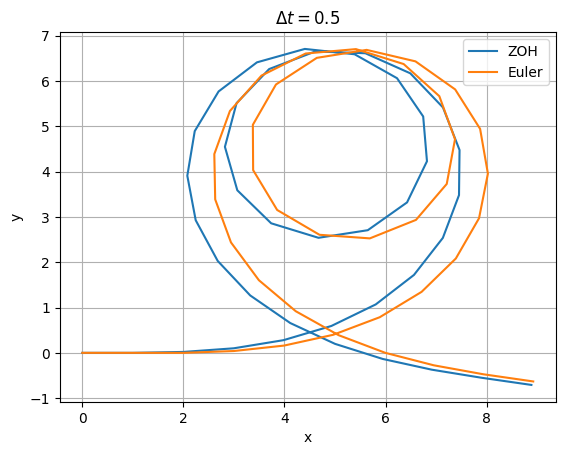

In [ ]:
# [put your code here]
# label your plots clearly, including a legend describing which trajectory corresponds to zero-order hold or euler integration

dt = 0.5

x = np.zeros(T+1)
y = np.zeros(T+1)
theta = np.zeros(T+1)
v = np.zeros(T+1)

x[0] = initial_state[0]
y[0] = initial_state[1]
theta[0] = initial_state[2]
v[0] = initial_state[3]

smallw = controls[:, 0] < 10**(-3)
index = np.where(smallw)[0]

for i in range(T):
    w = controls[i, 0]
    a = controls[i, 1]

    if i in index:
      x[i+1] = x[i] + v[i]*np.cos([theta[i]])*dt + 0.5*a*np.cos([theta[i]])*(dt**2)
      y[i+1] = y[i] + v[i]*np.sin([theta[i]])*dt + 0.5*a*np.sin([theta[i]])*(dt**2)
      theta[i+1] = theta[i]
      v[i+1] = v[i] + a*dt

    else:
      x[i+1] = (x[i] + v[i]*(np.sin([theta[i]+w*dt]) - np.sin(theta[i]))/w +
                (a*np.sin([theta[i]+w*dt]))*dt/w + a/w*(np.cos([theta[i]+w*dt]) - np.cos(theta[i]))/w)

      y[i+1] = (y[i] - v[i]*(np.cos([theta[i]+w*dt]) - np.cos(theta[i]))/w -
                (a*np.sin([theta[i]+w*dt]))*dt/w + a/w*(np.sin([theta[i]+w*dt]) - np.sin(theta[i]))/w)

      theta[i+1] = theta[i] + w*dt
      v[i+1] = v[i] + a*dt
################################################################################

x_ = np.zeros(T+1)
y_ = np.zeros(T+1)
theta_ = np.zeros(T+1)
v_ = np.zeros(T+1)

x_[0] = initial_state[0]
y_[0] = initial_state[1]
theta_[0] = initial_state[2]
v_[0] = initial_state[3]

for k in range(T):
    w_ = controls[k, 0]
    a_ = controls[k, 1]

    x_[k+1] = x_[k] + dt*v_[k]*np.cos([theta_[k]])
    y_[k+1] = y_[k] + dt*v_[k]*np.sin([theta_[k]])
    theta_[k+1] = theta_[k] + w_*dt
    v_[k+1] = v_[k] + a_*dt

plt.plot(x, y, x_, y_)
plt.title('$ \Delta t = 0.5 $')
plt.legend(['ZOH', 'Euler'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

## 3(b)
The error increases with the size of the time step. The difference between ZOH and Euler's integration for $ \Delta t = 0.01 $ is larger than $ \Delta t = 0.5 $ from the plots.

# Problem 4

## 4(a)

$A_t = \begin{bmatrix}
0 & 0 & -v_0 sin(\theta_0) & cos(\theta_0) \\
0 & 0 & v_0 cos(\theta_0) & sin(\theta_0) \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}$

$B_t = \begin{bmatrix}
0 & 0 \\
0 & 0 \\
1 & 0 \\
0 & 1 \\
\end{bmatrix}$

$C_t =  \begin{bmatrix}
-v_0 \theta_0 sin(\theta_0) \\
v_0 \theta_0 cos(\theta_0) \\
0 \\
0 \\
\end{bmatrix}$

## 4(b) Using Jax to perform automatic differentiation

In [ ]:
def linearize_dynamics_autodifferentiation(dynamics_func, state0: ArrayLike, control0: ArrayLike) -> tuple:
  '''
  dynamics_func: a function that takes in two inputs, state and control. i.e., dynamics_func(state, control)
  HINT: read documentation for jac.jacobian
  '''
  A = jax.jacfwd(lambda state: dynamics_func(state, control0))(state0)
  B = jax.jacfwd(lambda control: dynamics_func(state0, control))(control0)
  C = dynamics_func(state0, control0) - A@state0 - B@control0
  return A, B, C

def linearize_unicycle_dynamics_analytic(dynamics_func, state0: ArrayLike, control0: ArrayLike) -> tuple:
  '''
  dynamics_func: a function that takes in two inputs, state and control. i.e., dynamics_func(state, control)
  '''
  # use your answer from 4(a)
  A = jnp.array([[0, 0, -state0[3]*jnp.sin(state0[2]), jnp.cos(state0[2])],
                [0, 0, state0[3]*jnp.cos(state0[2]), jnp.sin(state0[2])],
                [0, 0, 0, 0], [0, 0, 0, 0]])
  B = jnp.array([[0, 0], [0, 0], [1, 0], [0, 1]])
  C = dynamics_func(state0, control0) - A@state0 - B@control0

  return A, B, C

def continuous_time_unicycle_dynamics(state: ArrayLike, control: ArrayLike) -> ArrayLike:
  xd = state[3]*jnp.cos(state[2])
  yd = state[3]*jnp.sin(state[2])
  thetad = control[0]
  vd = control[1]
  return jnp.array([xd, yd, thetad, vd])


In [ ]:
### DO NOT ALTER, but please run this cell for your submission ###
states0 = jnp.array([[0.0, 0.0, 0.0, 2.0],
                    [0.0, 0.0, jnp.pi, 5.0],
                    [1.0, -1.0, jnp.pi/2, 2.0],
                    [-2.0, 3.5, jnp.pi/3, 4.5]])
controls0 = jnp.array([[1.0, 0.0],
                       [-1.0, 0.1],
                       [0.5, -0.5],
                       [1E-4, 0.0]])
# potential issue when setting w = 0.0, hence setting w = 1E-4 instead (https://github.com/google/jax/issues/1052)

A_analytic, B_analytic, C_analytic = jax.vmap(linearize_unicycle_dynamics_analytic, [None, 0, 0])(continuous_time_unicycle_dynamics, states0, controls0)
A_autodiff, B_autodiff, C_autodiff = jax.vmap(linearize_dynamics_autodifferentiation, [None, 0, 0])(continuous_time_unicycle_dynamics, states0, controls0)

jnp.sum(A_analytic != A_autodiff) == 0, jnp.sum(B_analytic != B_autodiff) == 0, jnp.sum(C_analytic != C_autodiff) == 0
######################

(Array(True, dtype=bool), Array(True, dtype=bool), Array(True, dtype=bool))

## 4(c) Linearize discrete-time dynamics using autodiff

You maybe want to revise your code from 3(b) in order to deal with *batched* inputs. Read up on `jax.vmap` documentation, and some examples of how to use it are in the previous cell.

In [ ]:
def discrete_time_unicycle_dynamics(state: ArrayLike, control: ArrayLike) -> ArrayLike:

  dt = 0.01
  x = state[0]
  y = state[1]
  theta = state[2]
  v = state[3]
  w = control[0]
  a = control[1]
  smallw = jnp.abs(w) < 10**(-3)

  Ds = (jnp.sin(theta + w*dt) - jnp.sin(theta))/w
  Dc = (jnp.cos(theta + w*dt) - jnp.cos(theta))/w

  xd = jnp.where(smallw,
                  x + v*jnp.cos(theta)*dt + 0.5*a*jnp.cos(theta)*(dt**2),

                  x + v*Ds + a*jnp.sin(theta + w*dt)*dt/w + a/w*Dc)

  yd = jnp.where(smallw,
                  y + v*jnp.sin(theta)*dt + 0.5*a*jnp.sin(theta)*(dt**2),

                  y - v*Dc - a*jnp.cos(theta + w*dt)*dt/w + a/w*Ds)

  thetad = jnp.where(smallw,
                      theta,
                      theta + w*dt)

  vd = jnp.where(smallw,
                  v + a*dt,
                  v + a*dt)

  return jnp.array([xd, yd, thetad, vd])


In [ ]:
### DO NOT ALTER, but please run this cell for your submission ###
A_autodiff, B_autodiff, C_autodiff = jax.vmap(linearize_dynamics_autodifferentiation, [None, 0, 0])(discrete_time_unicycle_dynamics, states0, controls0)
####################

In [ ]:
### DO NOT ALTER, but please run this cell for your submission ###
A_autodiff
####################

Array([[[ 1.00000000e+00,  0.00000000e+00, -1.00016594e-04,
          9.99983307e-03],
        [ 0.00000000e+00,  1.00000000e+00,  1.99996661e-02,
          5.00082970e-05],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]],

       [[ 1.00000000e+00,  0.00000000e+00, -2.50073848e-04,
         -9.99982376e-03],
        [ 0.00000000e+00,  1.00000000e+00, -5.00041172e-02,
          5.00082970e-05],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]],

       [[ 1.00000000e+00,  0.00000000e+00, -1.99749302e-02,
         -2.50339508e-05],
        [ 0.00000000e+00,  1.00000000e+00, -4.99943271e-05,
          9.99994855e-03],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+

In [ ]:
### DO NOT ALTER, but please run this cell for your submission ###
B_autodiff
####################

Array([[[-6.6682696e-07,  4.9990034e-05],
        [ 9.9980069e-05,  3.3341348e-07],
        [ 9.9999998e-03,  0.0000000e+00],
        [ 0.0000000e+00,  9.9999998e-03]],

       [[-1.6188142e-06, -4.9989059e-05],
        [-2.4998048e-04,  3.2410026e-07],
        [ 9.9999998e-03,  0.0000000e+00],
        [ 0.0000000e+00,  9.9999998e-03]],

       [[-9.9660829e-05, -1.4714897e-07],
        [-4.2812462e-07,  4.9932460e-05],
        [ 9.9999998e-03,  0.0000000e+00],
        [ 0.0000000e+00,  9.9999998e-03]],

       [[ 0.0000000e+00,  2.4999998e-05],
        [ 0.0000000e+00,  4.3301272e-05],
        [ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  9.9999998e-03]]], dtype=float32)

In [ ]:
### DO NOT ALTER, but please run this cell for your submission ###
C_autodiff
####################

Array([[ 6.6682696e-07, -9.9980069e-05,  0.0000000e+00,  0.0000000e+00],
       [ 7.8401098e-04,  1.5684259e-01,  9.3132257e-09, -7.2526745e-08],
       [ 3.1426355e-02,  7.8764868e-05, -4.6566129e-09,  4.6566129e-09],
       [ 4.0810585e-02, -2.3561954e-02,  0.0000000e+00,  0.0000000e+00]],      dtype=float32)

# Problem 5

## 5(a) Linearization error

In [ ]:
# no starter code for this problem. You are free to implement it how ever you like. Use previous code for inspiration.  :)
def f(x: ArrayLike, u: ArrayLike) -> ArrayLike:

  mc = 1; mp = 1; l = 1; g = 9.81

  cp1 = x[2]
  cp2 = x[3]
  cp3 = 1/(mc + mp*(jnp.sin(x[1])**2))*(u[0] + mp*jnp.sin(x[1])*(l*(x[3]**2) + g*jnp.cos(x[1])))
  cp4 = 1/(l*(mc + mp*(jnp.sin(x[1])**2)))*(-u[0]*jnp.cos(x[1]) - mp*l*(x[3]**2)*jnp.cos(x[1])*jnp.sin(x[1]) - (mc + mp)*g*jnp.sin(x[1]))

  return jnp.array([cp1, cp2, cp3, cp4])

def AB_lin(function, xstar: ArrayLike, ustar: ArrayLike) -> tuple:
  A = jax.jacfwd(lambda x: function(x, ustar))(xstar)
  B = jax.jacfwd(lambda u: function(xstar, u))(ustar)

  return A, B

x_star = np.array([0, jnp.pi, 0, 0], dtype=float)
u_star = np.array([0], dtype=float)

A_autodiff, B_autodiff = AB_lin(f, x_star, u_star)

def f_lin(x, u):

  x_bar = x - x_star
  u_bar = u - u_star
  A = A_autodiff
  B = B_autodiff

  return A @ x_bar + B @ u_bar

def error(x, u):
  return jnp.linalg.norm(f(x, u) - f_lin(x, u), ord = 2)

x_input = jnp.array([[0, 0.99*jnp.pi, 0, 0],
                    [0, 0.9*jnp.pi, 0, 0],
                    [0, 0.85*jnp.pi, 0, 0],
                    [0, 0.5*jnp.pi, 0, 0],
                    [0, 0, 0, 0],
                    [1, jnp.pi, 0,0]])

u_input = jnp.array([[0],
                    [-10],
                    [0],
                    [0],
                    [0],
                    [10]])

errors = [error(x_input[i], u_input[i]) for i in range(6)]

for i, e in enumerate(errors):
    question = np.array(["i", "ii", "iii", "iv", "v", "vi"])
    print("Linearization error for " + question[i] + " = " + str(e))


Linearization error for i = 0.0008729859
Linearization error for ii = 2.3539805
Linearization error for iii = 2.2886374
Linearization error for iv = 26.054409
Linearization error for v = 68.91344
Linearization error for vi = 2.1324806e-06


## 5(b)
Yes. Based on the definition of linearization, it makes sense that the error gets larger as the evaluated condition get further from the unstable equilibrium point.